## Introductory Section 


The dataset contains information about 10,001 different financial instruments. Each entry gives details about specific indices, companies, and market conditions.

### Key attributes are:

1. **Unique ID:** A unique identifier for each financial instrument.
2. **Date:** The date the information was recorded.
3. **Index Name:** The type of financial index.
4. **Company:** The associated company.
5. **Type:** Classification as either "non-LargeCap" or "LargeCap."
6. **Rating:** A numerical rating.
7. **Price:** The price of the financial instrument.
8. **Fluctuation Rate:** How much the instrument's value changes.


#### Step 1: Create Index Class with following attributes

1. Unique ID
3. Index Name
4. Company
5. Type
6. Rating
7. Price
8. Fluctuation Rate

In [1]:
class Index:
    def __init__(self, date, index_name,company,type,rating,price,fluct_rate):
        self.date = date
        self.index_name = index_name
        self.company = company
        self.type = type
        self.rating = rating
        self.price = price
        self.fluct_rate = fluct_rate
        self.unique_id = id(self)
    
    def __str__(self):
        return f"{self.unique_id},{self.date},{self.index_name},{self.company},{self.type},{self.rating},{self.price},{self.fluct_rate}"


#### Step 2: Creating two subclasses LargeCapIndex and NonLargeCapIndex

In [2]:
class LargeCapIndex(Index):
    def __init__(self, date, index_name, company, rating, price, fluct_rate):
        super().__init__(date, index_name, company, "LargeCapIndex", rating, price, fluct_rate)


In [3]:
class NonLargeCapIndex(Index):
    def __init__(self, date, index_name, company, rating, price, fluct_rate):
        super().__init__(date, index_name, company, "NonLargeCapIndex", rating, price, fluct_rate)

#### Step 3 : Create three additional subclasses: SNP, DJ, NASDAQ, inheriting from LargeCapIndex and NonLargeCapIndex, NonLargeCapIndex respectively.

In [4]:
 
class SNP(LargeCapIndex):
    def __init__(self,date,index_name,rating,price,fluct_rate):
        super().__init__(date,index_name,"SNP",rating,price,fluct_rate)

class DJ(NonLargeCapIndex):
    def __init__(self,date,index_name,rating,price,fluct_rate):
        super().__init__(date,index_name,"DJ",rating,price,fluct_rate)


class NASDAQ(NonLargeCapIndex):
        def __init__(self,date,index_name,rating,price,fluct_rate):
          super().__init__(date,index_name,"NASDAQ",rating,price,fluct_rate)

#### Step 4: Testing data

In [5]:
DJIndex = DJ("2022-11-15","index_name", 2, 641, 86.06)
print(str(DJIndex))

4403981456,2022-11-15,index_name,DJ,NonLargeCapIndex,2,641,86.06


#### Step 5 : Importing the pickle file

In [8]:
import pickle

with open("/Users/mayuriparkhi/Downloads/Indexpkl306.dat", "rb") as fb:  
    try: 
        while (True): 
            auto = pickle.load(fb)
        print(auto) 
    except Exception: 
        pass

In [9]:
with open('data.csv', 'w') as f: 
    f.write("uniqueId,date,index_name,company,type,rating,price,fluct_rate\n") 
    for obj in auto:
        f.write(str(obj)+'\n')

#### Step 6: Loaded CSV file 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('data.csv')
data 

,uniqueId,date,index_name,company,type,rating,price,fluct_rate
0,134289276437168,2022-01-16,NQGI,NASDAQ,non-LargeCap,4.0,NaN,12.95
1,134289276443984,2022-06-20,DSI,DJ,non-LargeCap,4.0,252.0,18.22
2,134289276444032,2022-04-12,NDX,NASDAQ,non-LargeCap,4.0,106.0,23.85
3,134289276443168,2022-07-12,500,SNP,LargeCap,4.0,130.0,16.65
4,134289276443504,2022-04-21,D30,DJ,non-LargeCap,5.0,247.0,11.06
...,...,...,...,...,...,...,...,...
9995,134289266718800,2022-06-01,SOX,NASDAQ,non-LargeCap,4.0,129.0,12.10
9996,134289266718848,NaN,400,SNP,LargeCap,5.0,105.0,11.43
9997,134289266718896,2022-11-14,NDX,NASDAQ,non-LargeCap,4.0,194.0,21.03
9998,134289266718944,2022-04-16,400,SNP,LargeCap,5.0,143.0,20.18



### MISSING VALUES IN THE DATA

The data exhibits missing values in the following columns:

1. **Date**
2. **Rating**
3. **Price**
4. **Fluctuation Rate**



In [12]:
data.isna().sum()

uniqueId        0
date          426
index_name      0
company         0
type            0
rating        428
price         432
fluct_rate    466
dtype: int64

In [13]:
data.isnull().sum()

uniqueId        0
date          426
index_name      0
company         0
type            0
rating        428
price         432
fluct_rate    466
dtype: int64

In [14]:
print(data['date'].mode()[0])
print(data['rating'].mode()[0])
print(data['price'].mean())
print(data['fluct_rate'].mean())

2022-07-31
4.0
149.70714882943145
15.109303545206627


#### For filling out missing data in categorical columns such as 'date' and 'rating', a mode-based imputation approach was utilized.

In [15]:
cols = ['date', 'rating']

for column in cols:
    data[column].fillna(data[column].mode()[0], inplace=True)


#### For numerical data, mean imputation was used.

In [16]:
cols = ['price', 'fluct_rate']

for column in cols:
    data[column].fillna(data[column].mean(), inplace=True)
    data[column] = data[column].round(2)

In [17]:
data.isnull().sum()

# All missing values have been successfully filled in the dataset.

uniqueId      0
date          0
index_name    0
company       0
type          0
rating        0
price         0
fluct_rate    0
dtype: int64

In [18]:
data 

,uniqueId,date,index_name,company,type,rating,price,fluct_rate
0,134289276437168,2022-01-16,NQGI,NASDAQ,non-LargeCap,4.0,149.71,12.95
1,134289276443984,2022-06-20,DSI,DJ,non-LargeCap,4.0,252.00,18.22
2,134289276444032,2022-04-12,NDX,NASDAQ,non-LargeCap,4.0,106.00,23.85
3,134289276443168,2022-07-12,500,SNP,LargeCap,4.0,130.00,16.65
4,134289276443504,2022-04-21,D30,DJ,non-LargeCap,5.0,247.00,11.06
...,...,...,...,...,...,...,...,...
9995,134289266718800,2022-06-01,SOX,NASDAQ,non-LargeCap,4.0,129.00,12.10
9996,134289266718848,2022-07-31,400,SNP,LargeCap,5.0,105.00,11.43
9997,134289266718896,2022-11-14,NDX,NASDAQ,non-LargeCap,4.0,194.00,21.03
9998,134289266718944,2022-04-16,400,SNP,LargeCap,5.0,143.00,20.18


In [19]:
data.to_csv('updated_data.csv', index=False)

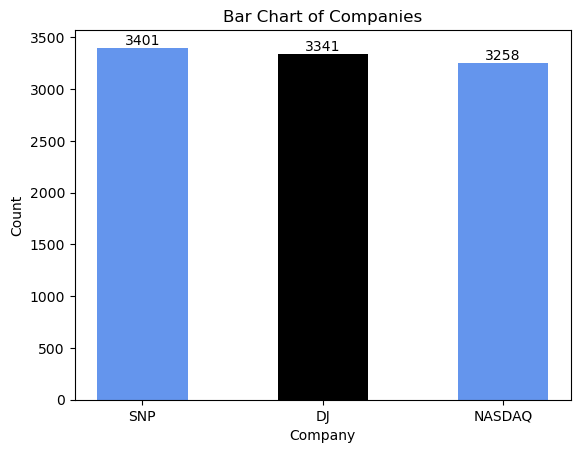

In [20]:
import matplotlib.pyplot as plt

index_counts = data['company'].value_counts()


plt.bar(index_counts.index, index_counts.values,width =0.5, color = ['cornflowerblue', 'black'])
for i, value in enumerate(index_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Bar Chart of Companies')
plt.show()

### Bar Chart

The bar graph encapsulates the counts of companies within the dataset, revealing distinctive figures for each.


- SNP has the highest count among the three, leading with 3401 companies.
- DJ closely follows with 3341 companies, exhibiting a minimal difference.
- NASDAQ trails with 3258 companies, maintaining a slightly lower count.

***Inference:***

The slight disparities in company counts for SNP, DJ, and NASDAQ imply a competitive and relatively balanced distribution of companies within the dataset.

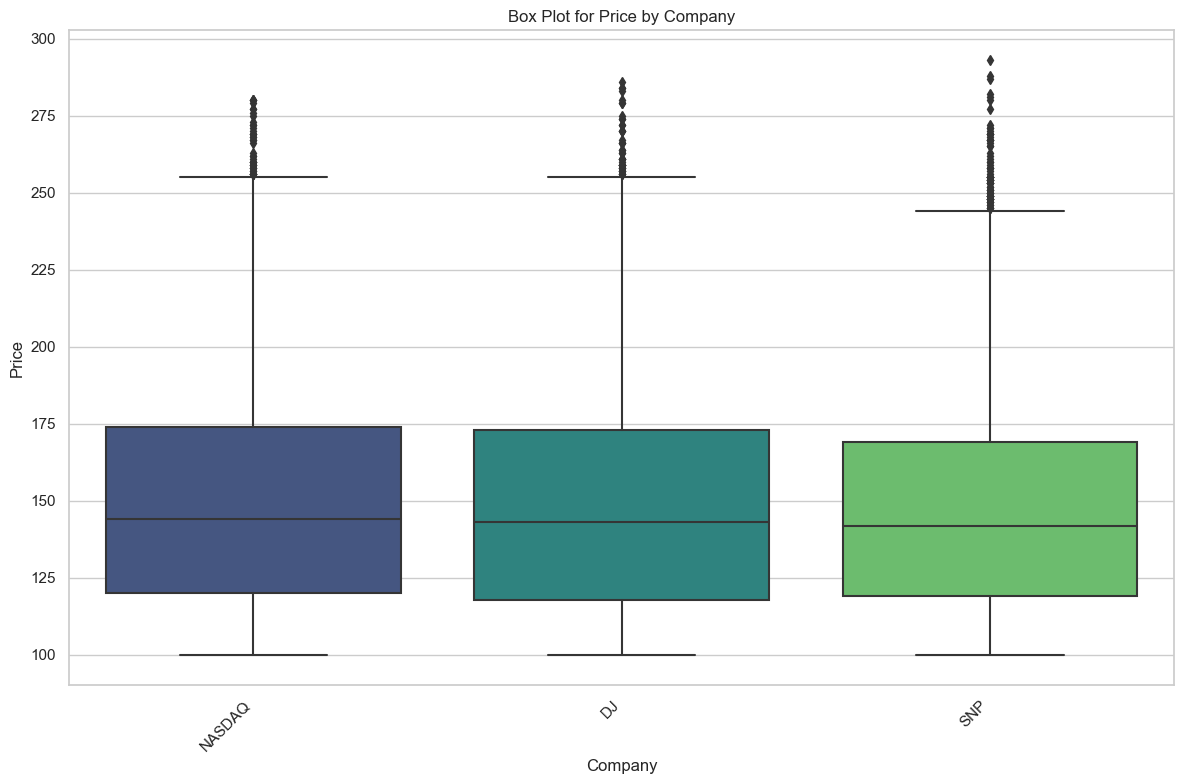

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 : Grab data to Visualize
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Step 2 : Call the specific plotting function to render the visualization type
#Create a box plot for 'price' grouped by 'company'

sns.boxplot(x='company', y='price', data=data, palette='viridis')

#Step 3 :  Add labels and title
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Box Plot for Price by Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Step 4 : Render the visualization
plt.show()

### Box Plot
This Box plot provides a visual summary of the distribution of prices for each company, making it easy to compare the central tendency and spread of prices across different companies.

The box plot reveals that NASDAQ and DJ share similar price distributions, with nearly identical medians. 


In contrast, SNP stands out, showing a consistently lower median, indicating generally lower prices. 
In summary, NASDAQ and DJ exhibit similar pricing patterns, while SNP consistently maintains a lower average price level.

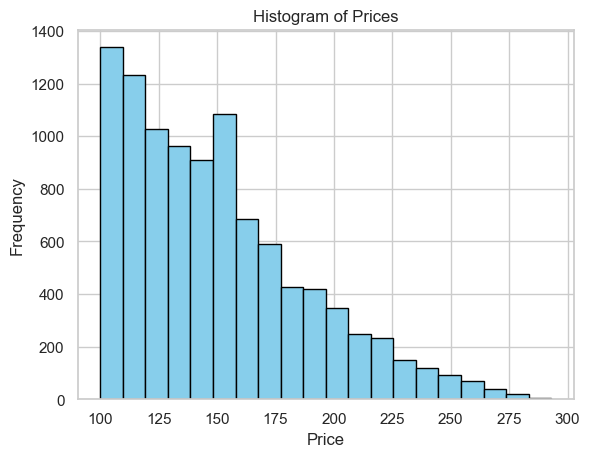

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1 : Grab data to Visualize
# Step 2 : Call the specific plotting function to render the visualization type

# Create a histogram for 'price'
plt.hist(data['price'], bins=20, color='skyblue', edgecolor='black')

#Step 3 :  Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')

#Step 4 : Render the visualization
plt.show()


### Hisogram

- The histogram visually represents the distribution of prices within the dataset.
- The x-axis likely denotes various price ranges, while the y-axis indicates the frequency or count of occurrences in each range. 
- Specifically, the histogram highlights a peak between 1300 and 1400, signifying the most frequent price range. 
- This positively skewed distribution, with a tail extending towards higher values.


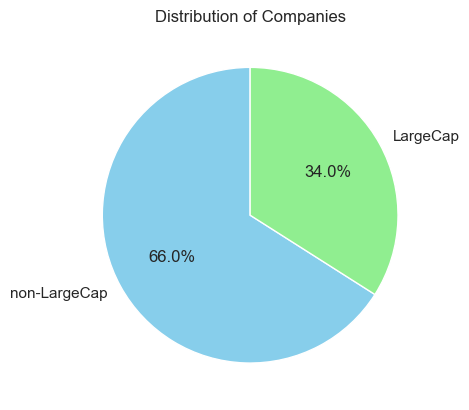

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1 : Grab data to Visualize
company_counts = data['type'].value_counts()

# Step 2 : Call the specific plotting function to render the visualization type
# Create a pie chart for 'market type'
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

#Step 3 :  Add labels and title
plt.title('Distribution of Companies')

#Step 4 : Render the visualization
plt.show()


### Pie Chart
#### DATA TRENDS: LARGE CAP AND NON-LARGE CAP DISTRIBUTION

The pie chart offers insights into the distribution of data between two categories: Large Cap and Non-Large Cap. 


***Large Cap :*** 
    
Large Cap entities represent 34.0% of the total composition. Large Cap, short for "Large Capitalization," designates companies with significant market capitalization, typically reflecting industry leaders with established stability. 
These companies are often considered pillars of the market and known for their size.

***Non-Large Cap:*** 
    
Non-Large Cap entities constitute the majority share at 66.0%. This category encompasses companies with smaller market capitalizations, often associated with mid-sized and smaller enterprises.

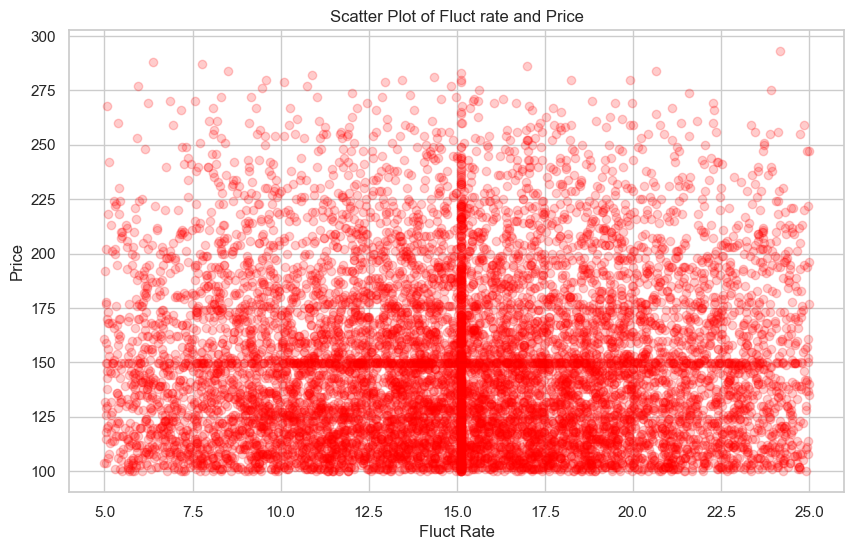

In [24]:
import matplotlib.pyplot as plt

# Step 1 : Grab data to Visualize
plt.figure(figsize=(10, 6))

# Step 2 : Call the specific plotting function to render the visualization type
# Create a scatter plot for 'rating' and 'price'
plt.scatter(data['fluct_rate'], data['price'], color='red', alpha=0.2)

#Step 3 :  Add labels and title
plt.xlabel('Fluct Rate')
plt.ylabel('Price')
plt.title('Scatter Plot of Fluct rate and Price')

#Step 4 : Render the visualization
plt.show()

### Scatter Plot

- **Scatter Plot Overview:**
  - Depicts fluctuation rate against price.

- **Correlation:**
  - No clear correlation observed.

- **Data Dispersion:**
  - Prices show diverse distribution.

- **Conclusion:**
  - Lack of a distinct trend implies no strong correlation between fluctuation rate and price.

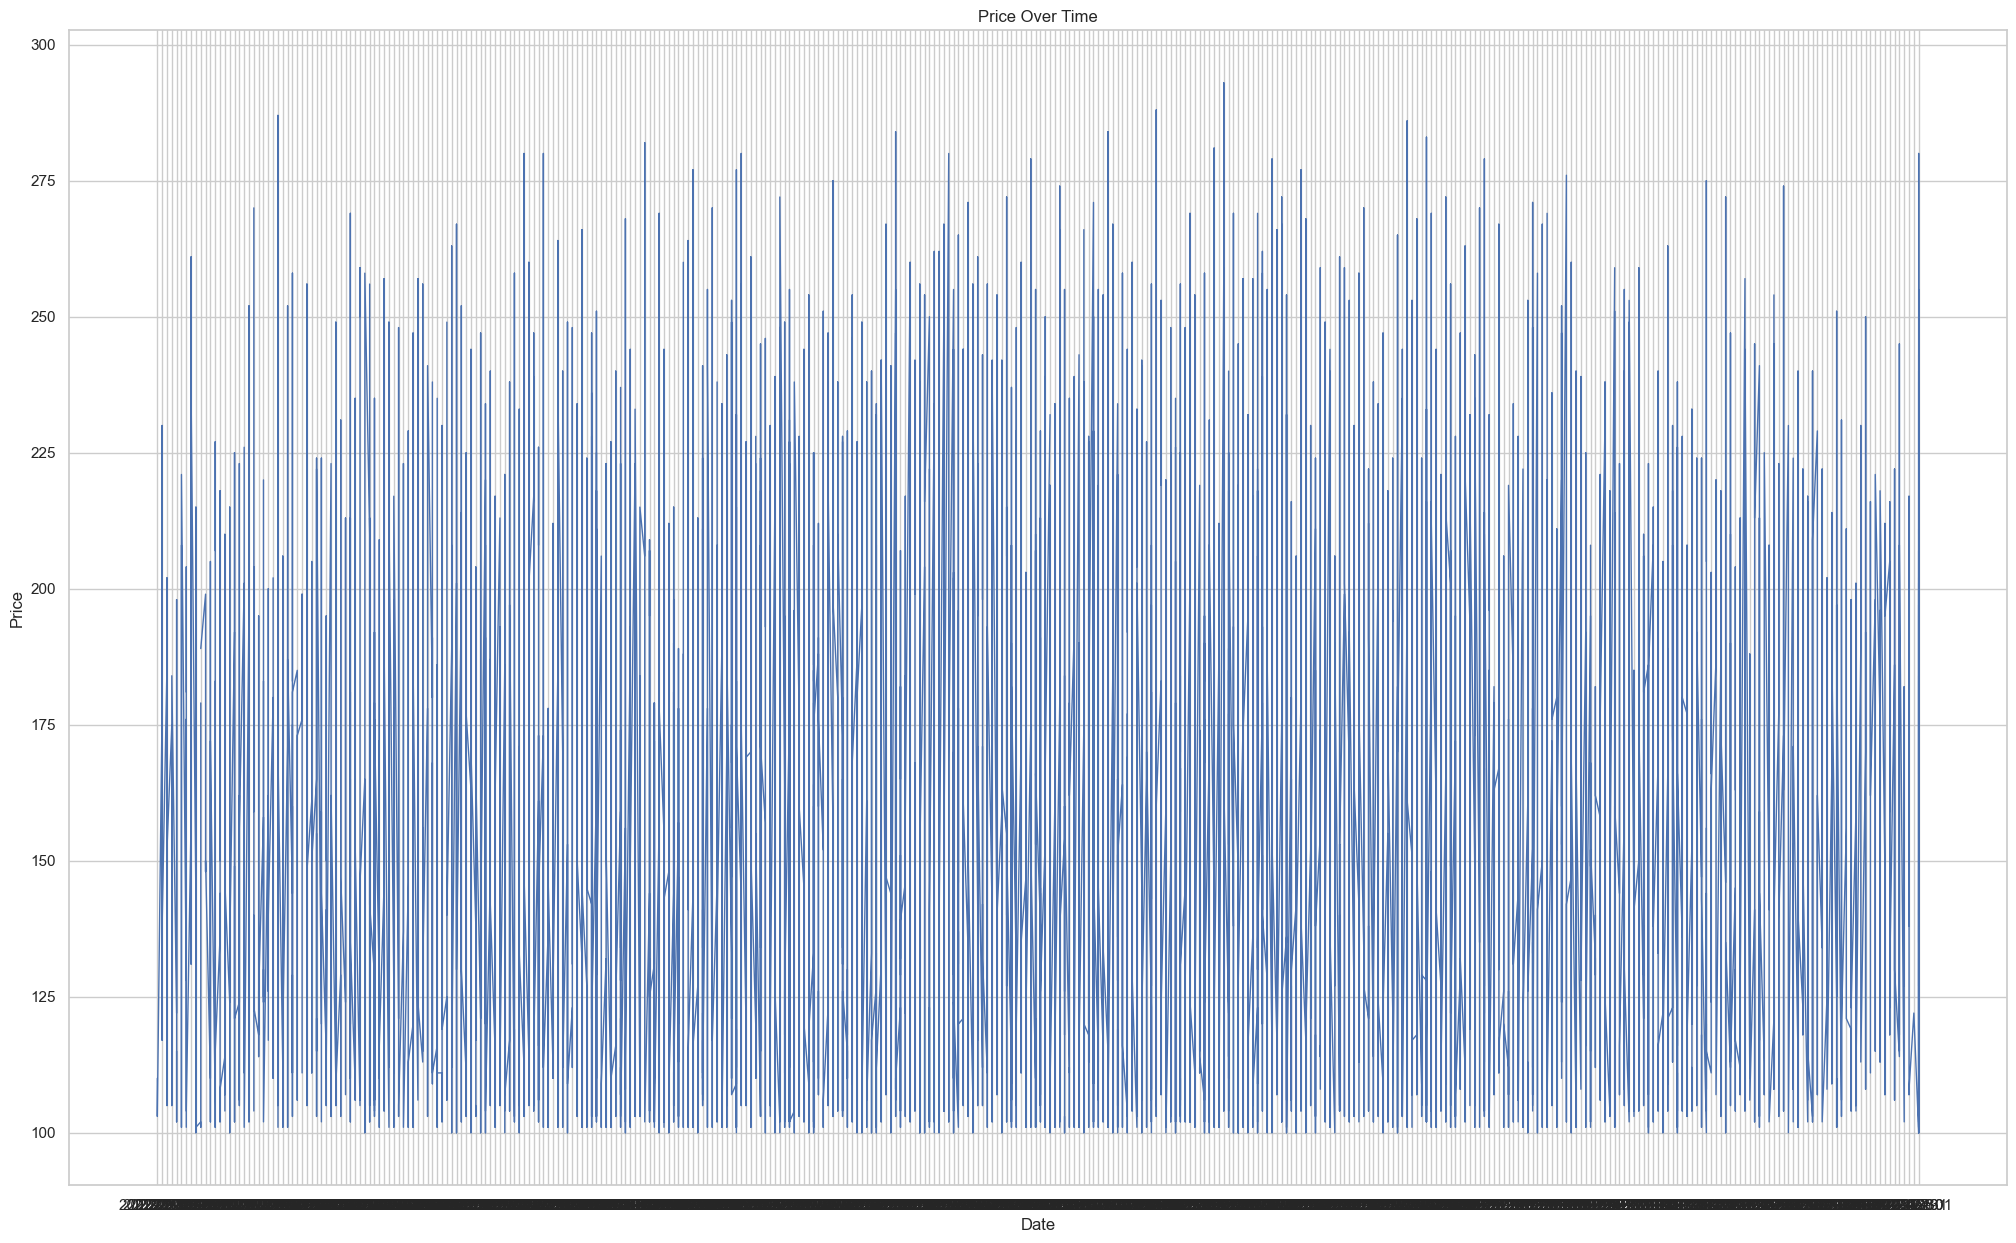

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1 : Grab data to Visualize
df = pd.read_csv('data.csv')
plt.figure(figsize=(25, 15))

# Sort the DataFrame based on the 'date' column
df = df.sort_values(by='date')
df['date'] = df['date'].astype(str)

# Step 2 : Call the specific plotting function to render the visualization type
plt.plot(df['date'], df['price'],linewidth=1)

#Step 3 :  Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time')

#Step 4 : Render the visualization
plt.show()

### Line Graph

**This line graph provides a visual representation of price dynamics over time.**


- **Observation:**
  - The line graph depicts the variation in price over time.

- **Trend Analysis:**
  - A visual inspection suggests a drastic fluctuation in prices.

- **Periodic Peaks and Troughs:**
  - Peaks and troughs in the graph signify potential periods of high and low prices.



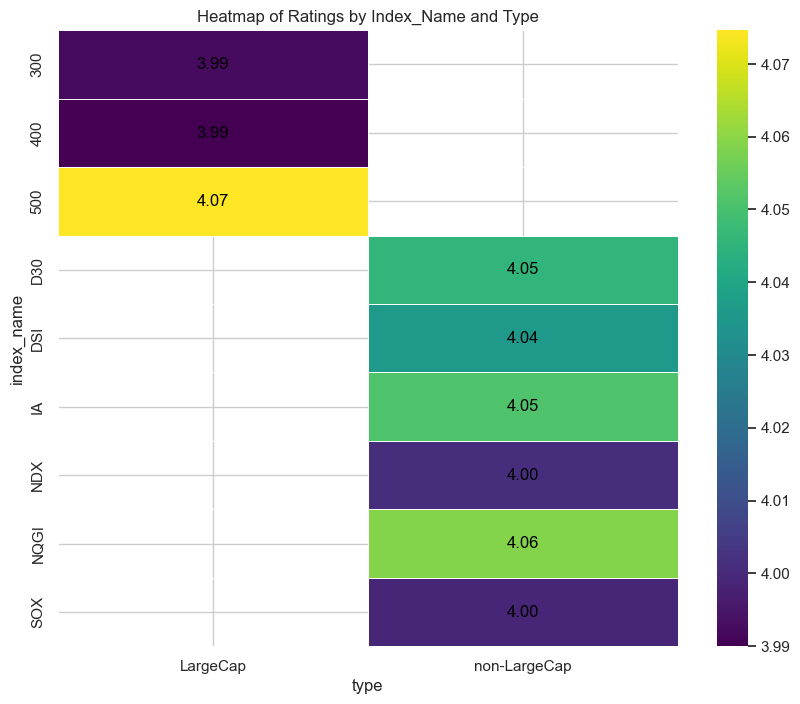

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 : Grab data to Visualize
df = pd.read_csv('data.csv')

heatmap_data = df.pivot_table(index='index_name', columns='type', values='rating')
plt.figure(figsize=(10, 8))

# Step 2 : Call the specific plotting function to render the visualization type
# Create a heatmap using seaborn
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", linewidths=.5,annot_kws={"color": "black"})


#Step 3 :  Add labels and title
plt.title('Heatmap of Ratings by Index_Name and Type')

#Step 4 : Render the visualization
plt.show()


### Heatmap:

- The heatmap represents the relationship between 'Index_Name' and 'Type' with respect to the 'Rating' values.

- **Color Intensity:**
  - Darker colors indicate higher ratings, while lighter colors represent lower ratings.

- **Patterns and Trends:**
  - Observe patterns in the heatmap to identify trends in ratings for different index names and types.

- **High and Low Ratings:**
  - Identify areas of consistently high or low ratings across various index names and types.

- **Cross-Comparisons:**
  - Compare the intensity of colors within each index name to assess the impact of different types on ratings.

- **Annotations:**
  - Numbers within each cell represent the exact rating values, providing specific data points for analysis.

allow quick identification of patterns and trends in the data. 


## Conclusion:

In our analysis of price distribution across SNP, NASDAQ, and DJ, a notable observation emerged. SNP distinctly stands out, showcasing a consistently lower median ranging between 120 and 170. This pattern suggests generally lower prices compared to NASDAQ and DJ. 

Furthermore, SNP takes the lead with the highest count among the three, boasting 3401 companies.

Upon examining the balanced distribution of companies, we observed that Large Cap entities constitute 34.0%, symbolizing market leaders with significant capitalization, while Non-Large Cap entities, at 66.0%, represent smaller enterprises. This diversity provides a comprehensive snapshot of the market landscape.

Price fluctuations over time reveal a diverse pattern, with the most frequent price range peaking between 1300 and 1400. This distribution is positively skewed, indicating a trend towards higher values. Furthermore, the varied distribution of prices suggests a lack of correlation between prices and fluctuation rates.

Based on the data, SNP stands out as a top performer. Large-cap companies usually have higher ratings, and since SNP is one of them, it reinforces its status as a top player.